## Import Related Libraries


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Import Dataset


In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Replace 'your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('/content/drive/MyDrive/data set/student_depression_dataset.csv')
print("Dataset imported successfully!")
display(df.head())

Dataset imported successfully!


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


##  Data Preprocessing & EDA


In [8]:
# Check for null values in each column
null_counts = df.isnull().sum()

# Display the count of null values
print("Null values count for each column:")
print(null_counts)

Null values count for each column:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [9]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


##  Value Counts , Replace Values & Data Type Conversion


In [10]:
print(df.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


In [11]:
display(df['Sleep Duration'].value_counts())

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044
Others,18


In [12]:
# Replace old values with new values
df['Sleep Duration'].replace({
    "'More than 8 hours'": 9,
    "'5-6 hours'": 6,
    "'7-8 hours'": 8,
    "'Less than 5 hours'": 4,
    "Others": 0,
},inplace=True)

# Check the updated column
print(df['Sleep Duration'].value_counts())

Sleep Duration
4    8310
8    7346
6    6183
9    6044
0      18
Name: count, dtype: int64


/tmp/ipython-input-1678604020.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Duration'].replace({
/tmp/ipython-input-1678604020.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sleep Duration'].replace({


In [13]:
display(df['Study Satisfaction'].value_counts())

,count
Study Satisfaction,
4.0,6359
2.0,5838
3.0,5821
1.0,5451
5.0,4422
0.0,10


In [14]:
df['Study Satisfaction'] = df['Study Satisfaction'].astype(int)

In [15]:
display(df['Study Satisfaction'].value_counts())

,count
Study Satisfaction,
4,6359
2,5838
3,5821
1,5451
5,4422
0,10


In [16]:
display(df['Job Satisfaction'].value_counts())

,count
Job Satisfaction,
0.0,27893
2.0,3
4.0,2
1.0,2
3.0,1


In [17]:
df['Job Satisfaction'] = df['Job Satisfaction'].astype(int)
display(df['Job Satisfaction'].value_counts())

,count
Job Satisfaction,
0,27893
2,3
4,2
1,2
3,1


In [18]:
display(df['Work Pressure'].value_counts())

,count
Work Pressure,
0.0,27898
5.0,2
2.0,1


In [19]:
df['Work Pressure'] = df['Work Pressure'].astype(int)

In [20]:
display(df['Work Pressure'].value_counts())

,count
Work Pressure,
0,27898
5,2
2,1


In [21]:
display(df['Academic Pressure'].value_counts())

,count
Academic Pressure,
3.0,7462
5.0,6296
4.0,5155
1.0,4801
2.0,4178
0.0,9


In [22]:
# Replace old values with new values
df['Academic Pressure'] = df['Academic Pressure'].astype(int)
display(df['Academic Pressure'].value_counts())

,count
Academic Pressure,
3,7462
5,6296
4,5155
1,4801
2,4178
0,9


In [23]:
display(df['Financial Stress'].value_counts())

,count
Financial Stress,
5.0,6715
4.0,5775
3.0,5226
1.0,5121
2.0,5061
?,3


In [24]:
df['Financial Stress'].replace({
    "?": 0.0,
},inplace=True)

/tmp/ipython-input-2633442401.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].replace({


In [25]:
display(df['Financial Stress'].value_counts())

,count
Financial Stress,
5.0,6715
4.0,5775
3.0,5226
1.0,5121
2.0,5061
0.0,3


In [26]:
df['Financial Stress'] = df['Financial Stress'].astype(float).fillna(0).astype(int)
display(df['Financial Stress'].value_counts())

,count
Financial Stress,
5,6715
4,5775
3,5226
1,5121
2,5061
0,3


In [27]:
display(df.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,6,Healthy,B.Pharm,Yes,3.0,1,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,6,Moderate,BSc,No,3.0,2,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,4,Healthy,BA,No,9.0,1,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,8,Moderate,BCA,Yes,4.0,5,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,6,Moderate,M.Tech,Yes,1.0,1,No,0


##  Find Outliers


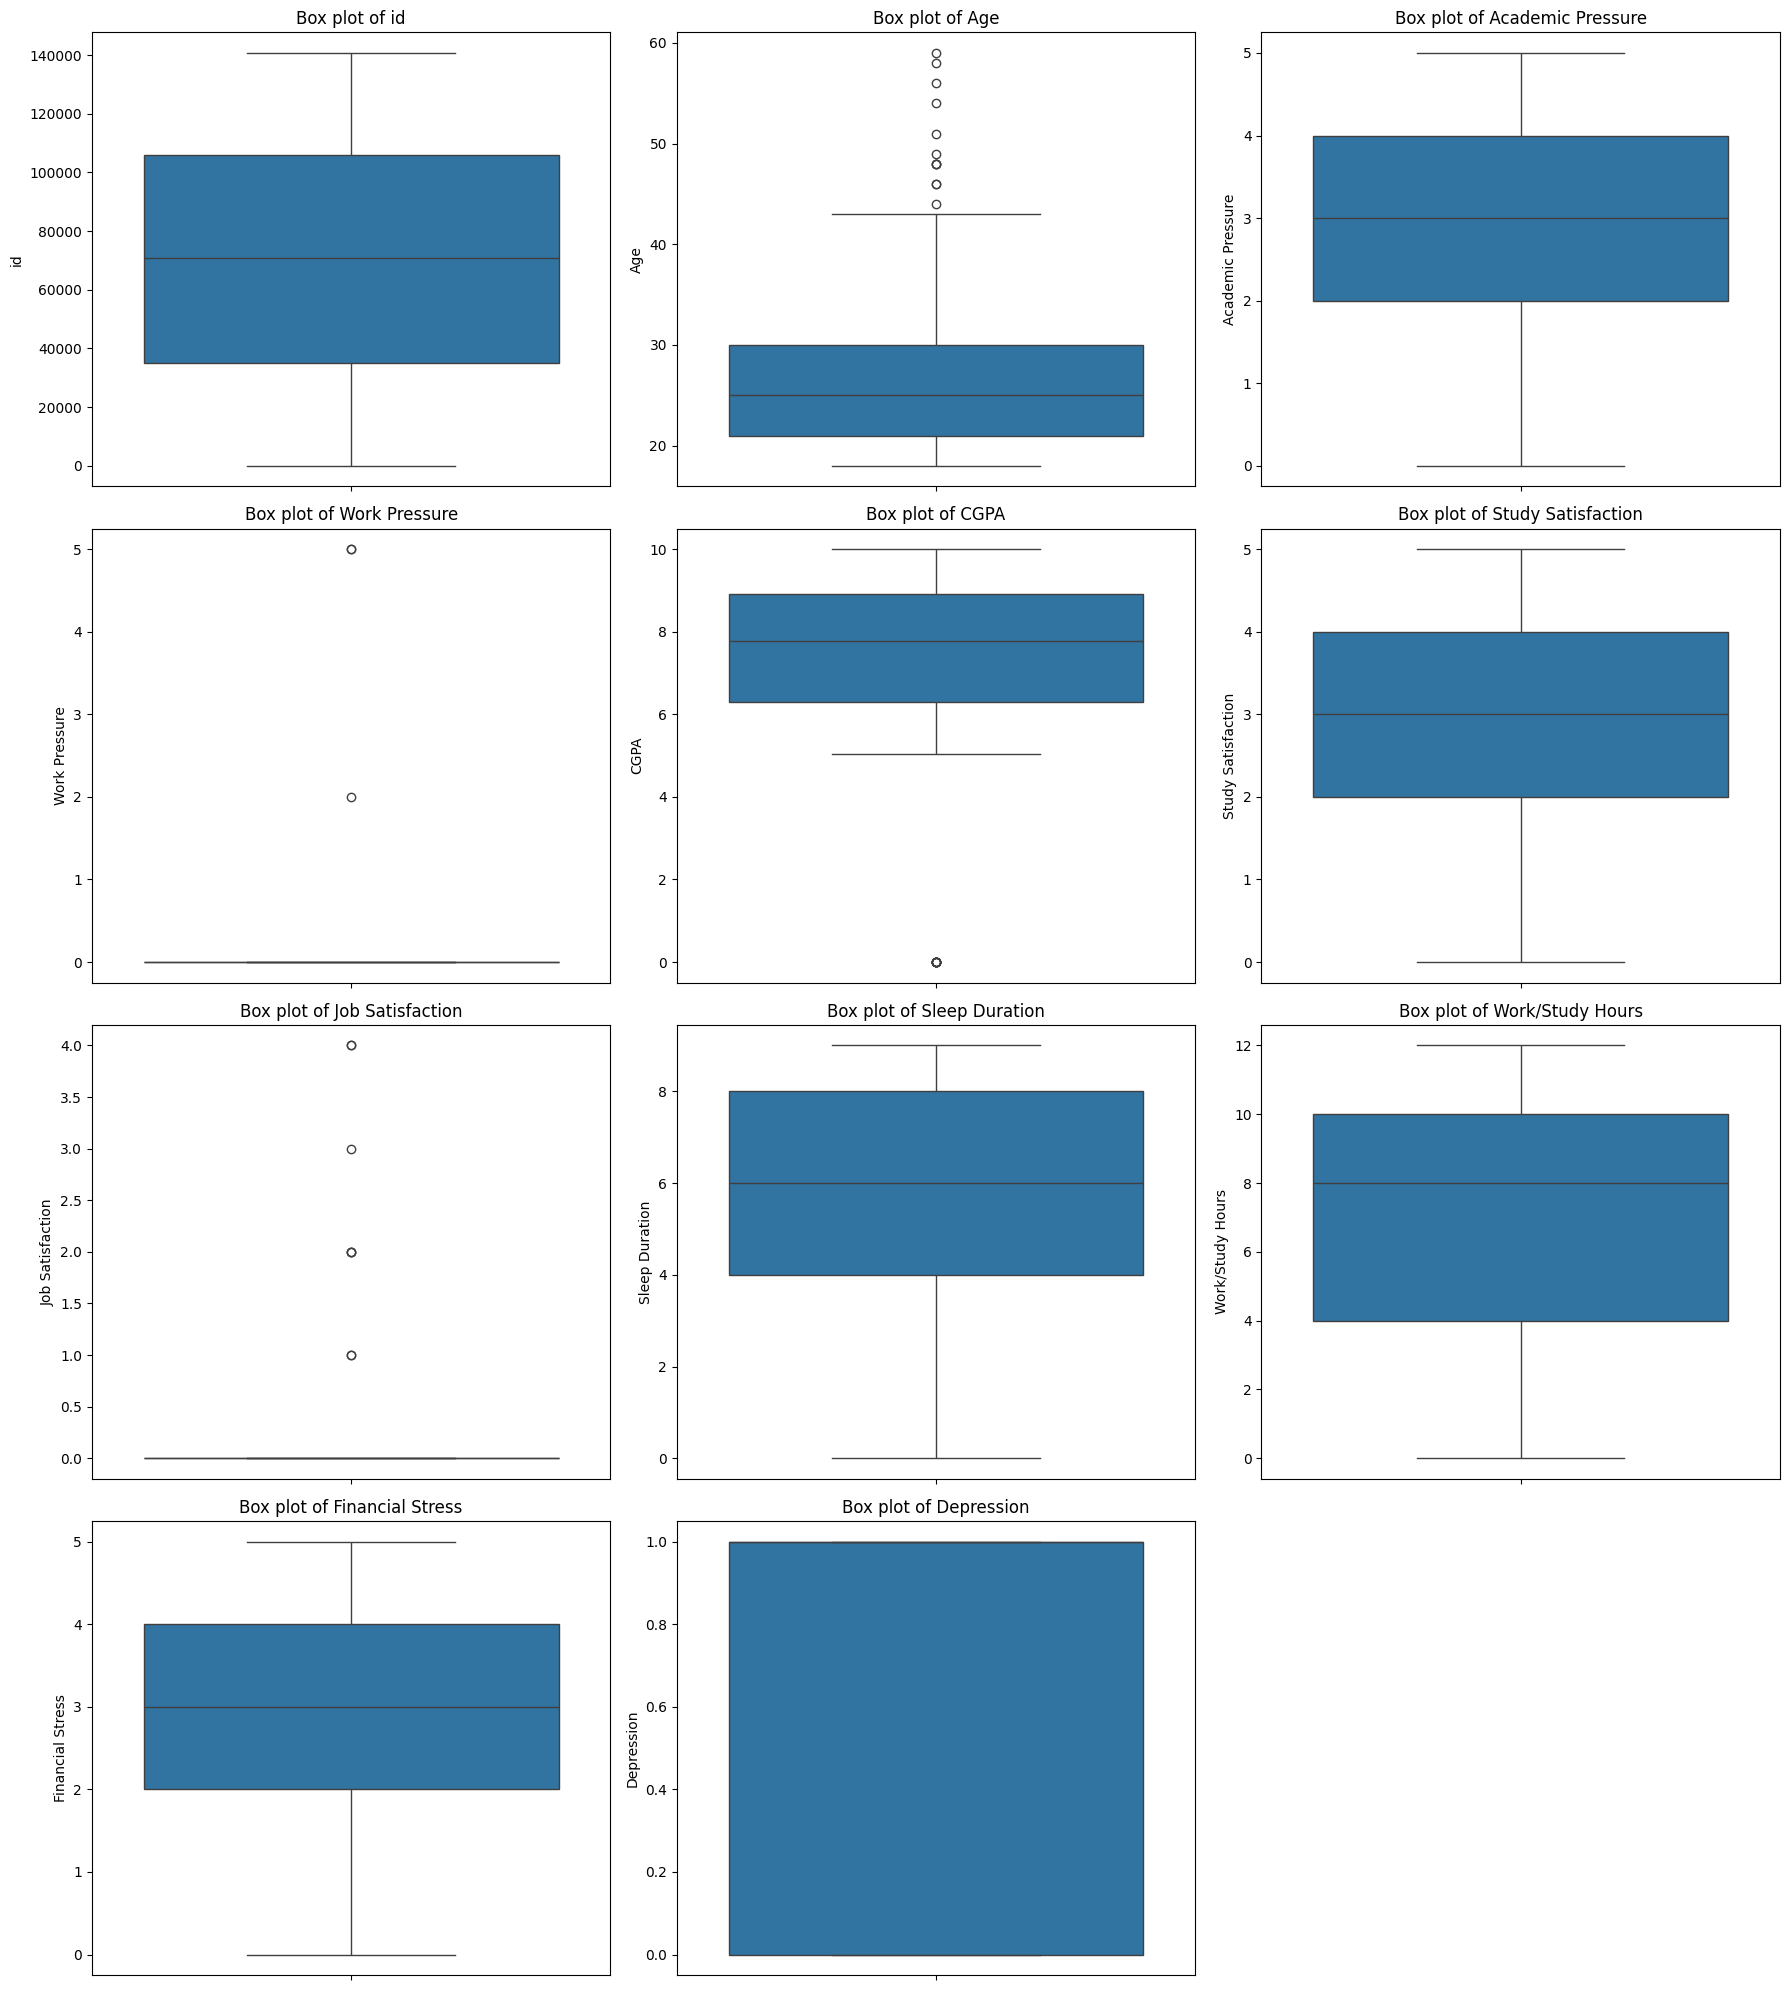

In [28]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

plt.figure(figsize=(18, n_rows * 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

##  Replace with column name and colum variable



In [29]:
col = 'Age'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("number of count in outlier:", len(outliers))
print("Outlier rows based on 'Age' column:")
display(outliers)

Lower Bound: 7.5
Upper Bound: 43.5
number of count in outlier: 12
Outlier rows based on 'Age' column:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2909,14768,Female,58.0,Chennai,Student,4,0,8.58,1,0,8,Healthy,'Class 12',No,4.0,4,No,0
3436,17213,Male,49.0,Nagpur,Student,3,0,6.47,3,0,6,Moderate,'Class 12',Yes,2.0,1,Yes,0
4386,22004,Female,51.0,Bhopal,Student,2,0,8.26,3,0,4,Moderate,MBBS,Yes,5.0,5,Yes,0
5537,27918,Female,44.0,Srinagar,Student,1,0,6.83,3,0,4,Unhealthy,BSc,No,4.0,3,No,0
9006,45393,Male,46.0,Nashik,Student,1,0,6.10,3,0,8,Unhealthy,PhD,No,4.0,2,No,0
9238,46602,Male,59.0,Nashik,Student,1,0,8.14,1,0,6,Unhealthy,PhD,Yes,10.0,4,Yes,0
13499,68441,Male,54.0,Agra,Student,5,0,9.60,2,0,9,Unhealthy,B.Ed,Yes,9.0,3,Yes,0
13618,69032,Female,48.0,Ghaziabad,Student,3,0,7.48,5,0,9,Healthy,LLB,No,2.0,4,No,0
14819,74887,Female,56.0,Ludhiana,Student,3,0,7.94,5,0,6,Unhealthy,BSc,No,1.0,5,Yes,0
18766,94978,Female,46.0,Lucknow,Student,3,0,6.83,1,0,6,Healthy,MCA,No,8.0,5,No,1


In [30]:
col = 'CGPA'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("number of count in outlier:", len(outliers))
print("Outlier rows based on 'CGPA' column:")
display(outliers)

Lower Bound: 2.345
Upper Bound: 12.865
number of count in outlier: 9
Outlier rows based on 'CGPA' column:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,21880,Male,38.0,Chennai,Student,0,5,0.0,0,4,6,Healthy,'Class 12',No,2.0,3,No,0
10407,52737,Male,28.0,Vadodara,Student,3,0,0.0,4,0,4,Healthy,BBA,No,12.0,2,No,0
11489,58062,Female,32.0,Vadodara,Student,5,0,0.0,0,0,4,Unhealthy,'Class 12',Yes,11.0,5,No,1
13909,70453,Female,20.0,Ahmedabad,Student,0,0,0.0,0,2,4,Moderate,'Class 12',Yes,12.0,3,Yes,1
14855,75007,Male,21.0,Lucknow,Student,0,2,0.0,0,1,8,Moderate,'Class 12',Yes,3.0,3,Yes,0
20913,105773,Male,18.0,Ahmedabad,Student,0,0,0.0,0,1,4,Moderate,'Class 12',Yes,9.0,5,No,1
21805,110097,Male,34.0,Pune,Student,1,0,0.0,5,0,4,Unhealthy,M.Ed,Yes,10.0,3,Yes,0
25746,129756,Male,18.0,Rajkot,Student,0,5,0.0,0,4,8,Moderate,'Class 12',Yes,9.0,4,No,1
26719,134830,Female,24.0,Meerut,Student,0,0,0.0,0,2,9,Unhealthy,'Class 12',No,0.0,5,No,0


In [31]:
col = 'Work Pressure'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("number of count in outlier:", len(outliers))
print("Outlier rows based on 'Work Pressure' column:")
display(outliers)

Lower Bound: 0.0
Upper Bound: 0.0
number of count in outlier: 3
Outlier rows based on 'Work Pressure' column:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,21880,Male,38.0,Chennai,Student,0,5,0.0,0,4,6,Healthy,'Class 12',No,2.0,3,No,0
14855,75007,Male,21.0,Lucknow,Student,0,2,0.0,0,1,8,Moderate,'Class 12',Yes,3.0,3,Yes,0
25746,129756,Male,18.0,Rajkot,Student,0,5,0.0,0,4,8,Moderate,'Class 12',Yes,9.0,4,No,1


In [32]:
col = 'Job Satisfaction'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("number of count in outlier:", len(outliers))
print("Outlier rows based on 'Job Satisfaction' column:")
display(outliers)

Lower Bound: 0.0
Upper Bound: 0.0
number of count in outlier: 8
Outlier rows based on 'Job Satisfaction' column:


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
292,1428,Male,29.0,Srinagar,Student,3,0,9.63,3,3,8,Moderate,M.Pharm,No,8.0,5,No,0
4365,21880,Male,38.0,Chennai,Student,0,5,0.00,0,4,6,Healthy,'Class 12',No,2.0,3,No,0
13909,70453,Female,20.0,Ahmedabad,Student,0,0,0.00,0,2,4,Moderate,'Class 12',Yes,12.0,3,Yes,1
14855,75007,Male,21.0,Lucknow,Student,0,2,0.00,0,1,8,Moderate,'Class 12',Yes,3.0,3,Yes,0
20913,105773,Male,18.0,Ahmedabad,Student,0,0,0.00,0,1,4,Moderate,'Class 12',Yes,9.0,5,No,1
23141,116703,Male,25.0,Bangalore,Student,4,0,9.44,5,2,4,Unhealthy,PhD,Yes,4.0,1,No,1
25746,129756,Male,18.0,Rajkot,Student,0,5,0.00,0,4,8,Moderate,'Class 12',Yes,9.0,4,No,1
26719,134830,Female,24.0,Meerut,Student,0,0,0.00,0,2,9,Unhealthy,'Class 12',No,0.0,5,No,0


## Make New Dataset Variable


In [33]:
cleaned_data=df

In [34]:
def data_count(col):
  display( cleaned_data[col].value_counts())
  print("--------------------------------------succes--------------------------------------")

In [35]:
cols = ['Gender', 'City', 'Profession', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', ]
for coll in cols:
 data_count(coll)

,count
Gender,
Male,15547
Female,12354


--------------------------------------succes--------------------------------------


,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


--------------------------------------succes--------------------------------------


,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


--------------------------------------succes--------------------------------------


,count
Dietary Habits,
Unhealthy,10317
Moderate,9921
Healthy,7651
Others,12


--------------------------------------succes--------------------------------------


,count
Degree,
'Class 12',6080
B.Ed,1867
B.Com,1506
B.Arch,1478
BCA,1433
MSc,1190
B.Tech,1152
MCA,1044
M.Tech,1022


--------------------------------------succes--------------------------------------


,count
Have you ever had suicidal thoughts ?,
Yes,17656
No,10245


--------------------------------------succes--------------------------------------


##  Make New Dataset Variable


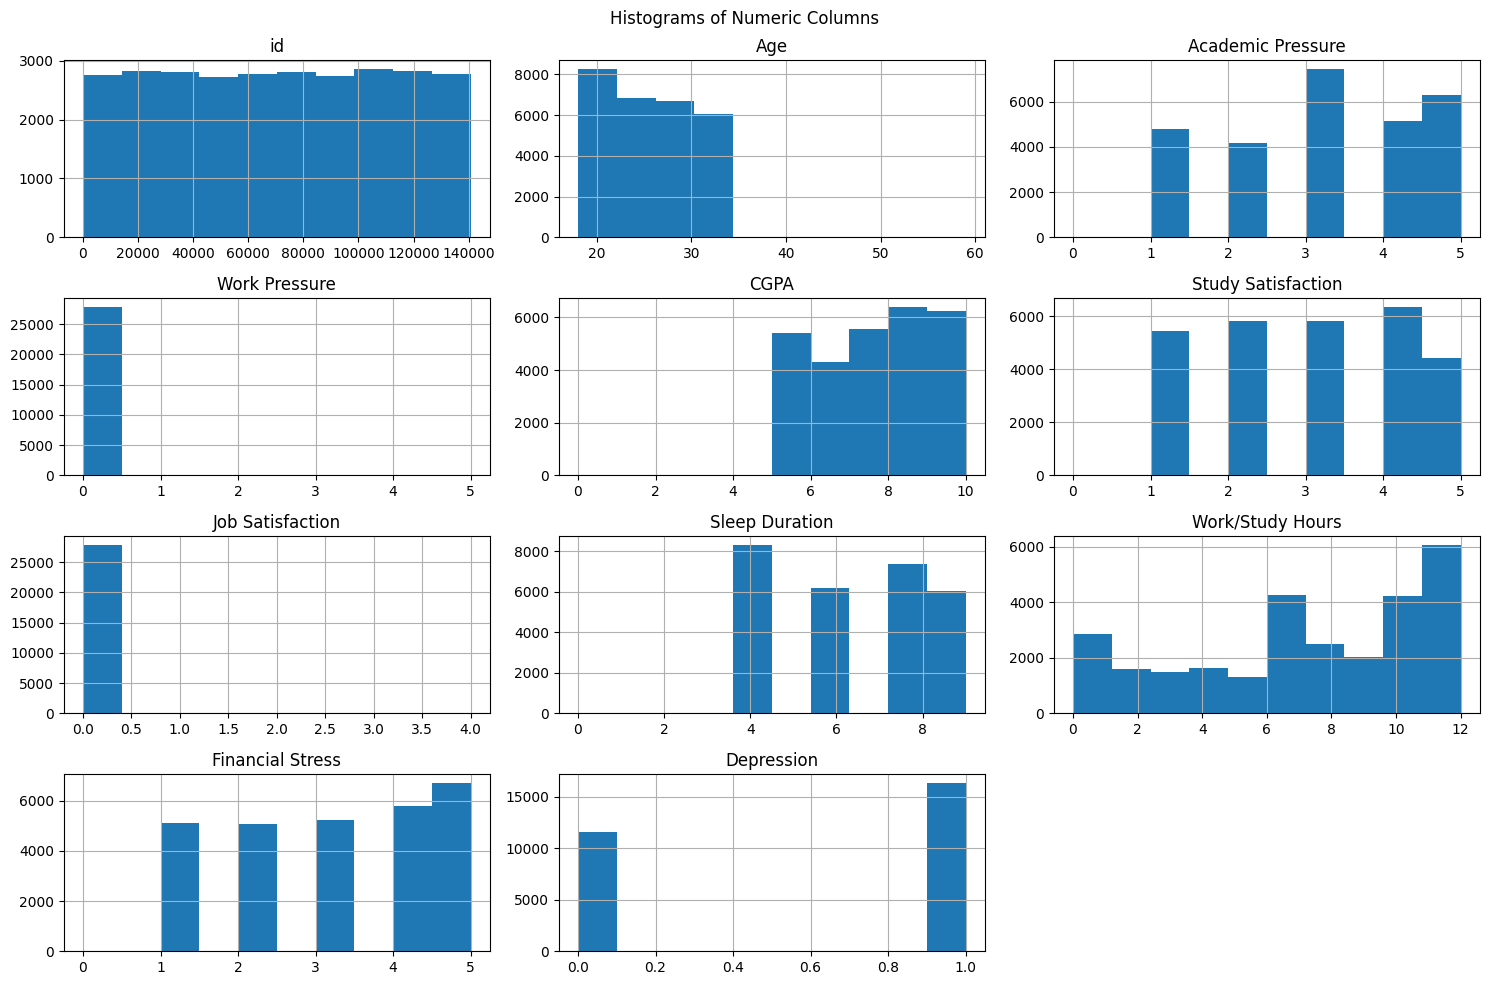

In [36]:
df.hist(figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.tight_layout()
plt.show()

In [37]:
print(cleaned_data.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                             int64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


/tmp/ipython-input-1782906060.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


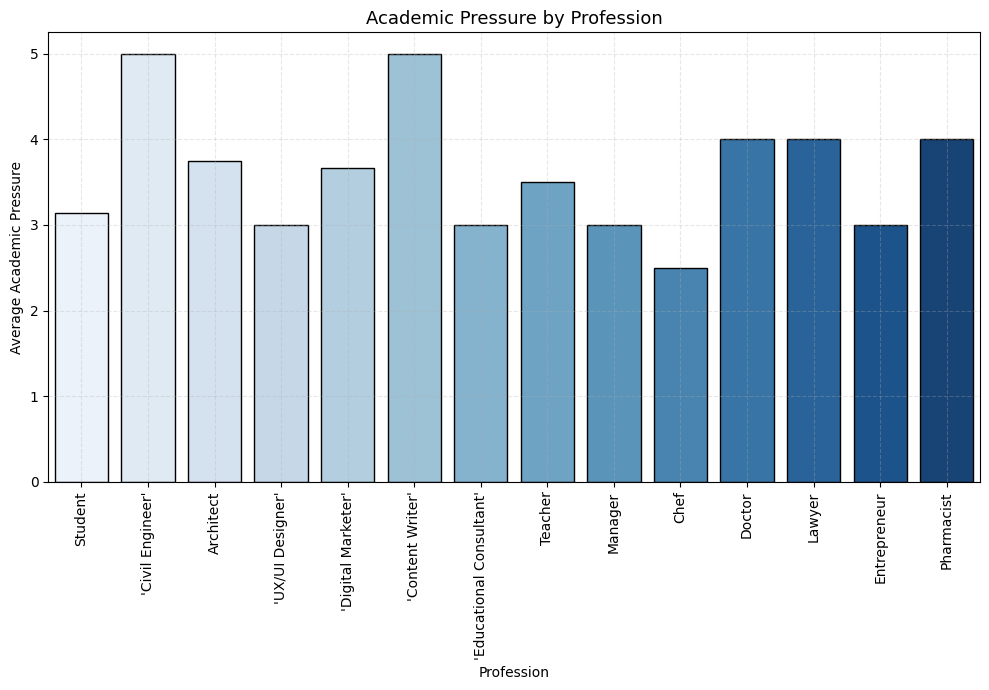

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(
    data=cleaned_data,
    x='Profession',
    y='Academic Pressure', # Corrected column name
    estimator='mean',         # Show mean academic pressure per profession
    errorbar=None,            # Remove error bars (optional)
    palette='Blues',          # Color theme
    edgecolor='black'         # Outline for bars
)

plt.title("Academic Pressure by Profession", fontsize=13)
plt.xlabel("Profession")
plt.ylabel("Average Academic Pressure")
plt.xticks(rotation=90)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

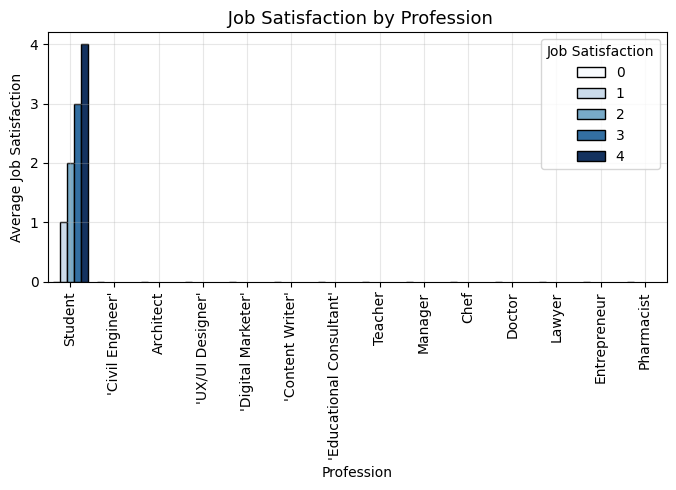

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x='Profession',
    y='Job Satisfaction',
    estimator='mean',
    errorbar=None,
    palette='Blues',
    edgecolor='black',
    hue='Job Satisfaction'
)

plt.title(" Job Satisfaction by Profession", fontsize=13)
plt.xlabel("Profession")
plt.ylabel("Average Job Satisfaction")
plt.xticks(rotation=90)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

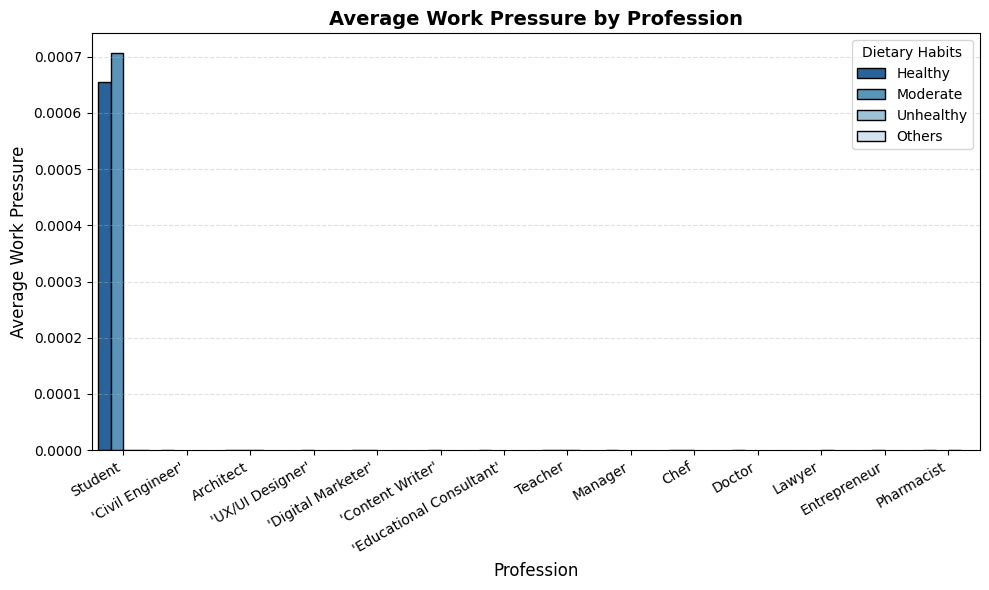

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=cleaned_data,
    x='Profession',
    y='Work Pressure',
    estimator='mean',
    errorbar=None,
    palette='Blues_r',
    edgecolor='black',
    hue='Dietary Habits'
)

plt.title("Average Work Pressure by Profession", fontsize=14, fontweight='bold')
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Average Work Pressure", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3167166741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


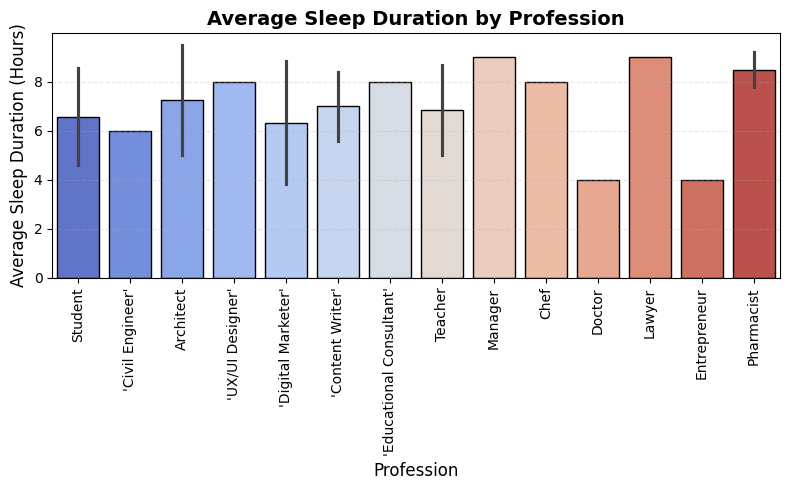

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=cleaned_data,
    x='Profession',
    y='Sleep Duration',
    estimator='mean',
    errorbar='sd',
    palette='coolwarm',
    edgecolor='black',
)

plt.title("Average Sleep Duration by Profession", fontsize=14, fontweight='bold')
plt.xlabel("Profession", fontsize=12)
plt.ylabel("Average Sleep Duration (Hours)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


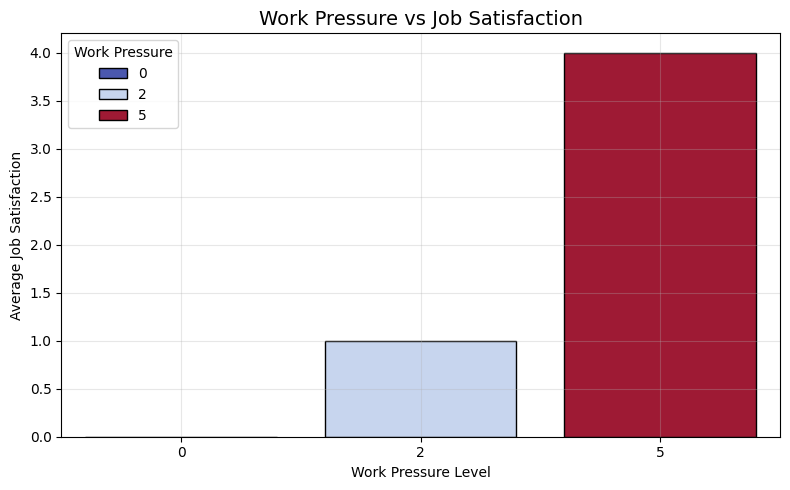

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=cleaned_data,
    x='Work Pressure',
    y='Job Satisfaction',
    estimator='mean',
    errorbar=None,
    palette='coolwarm',
    edgecolor='black',
    hue='Work Pressure'
)

plt.title("Work Pressure vs Job Satisfaction", fontsize=14)
plt.xlabel("Work Pressure Level")
plt.ylabel("Average Job Satisfaction")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1725262231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


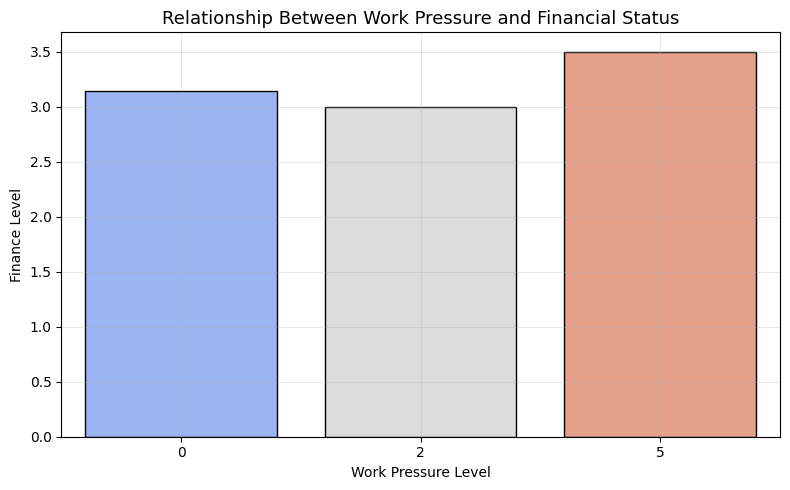

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=cleaned_data,
    x='Work Pressure',
    y='Financial Stress' ,
    estimator='mean',
    errorbar=None,
    palette='coolwarm',
    edgecolor='black'
)

plt.title("Relationship Between Work Pressure and Financial Status", fontsize=13)
plt.xlabel("Work Pressure Level")
plt.ylabel("Finance Level")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

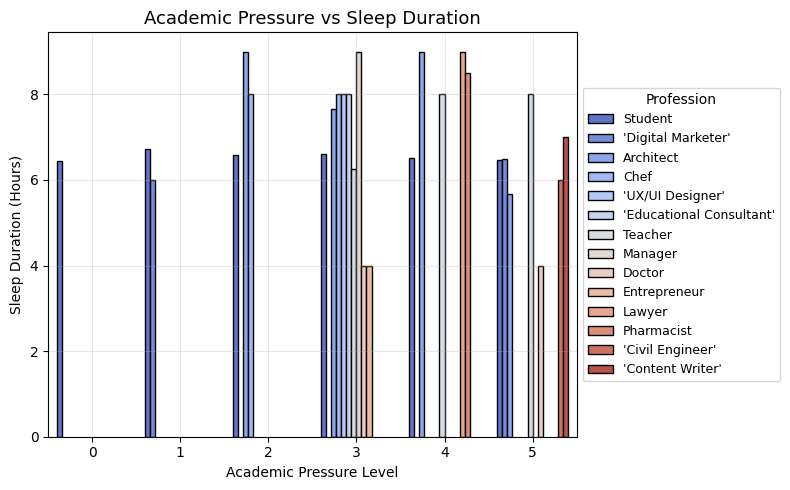

In [44]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=cleaned_data,
    x='Academic Pressure',
    y='Sleep Duration',
    estimator='mean',
    errorbar=None,
    palette='coolwarm',
    edgecolor='black',
    hue='Profession'

)

plt.title("Academic Pressure vs Sleep Duration", fontsize=13)
plt.xlabel("Academic Pressure Level")
plt.ylabel("Sleep Duration (Hours)")
plt.legend(
    title="Profession",
    title_fontsize=10,
    fontsize=9,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 500x1000 with 0 Axes>

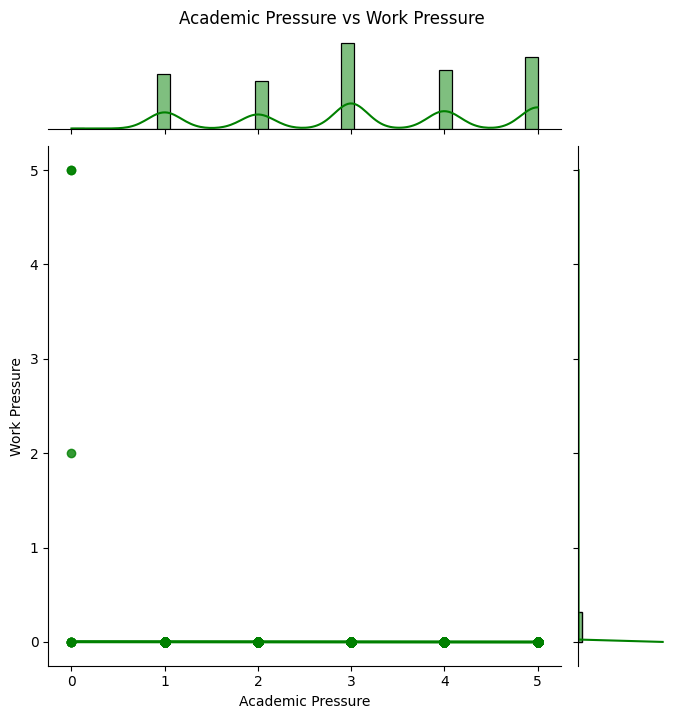

In [45]:
plt.figure(figsize=(5,10))
sns.jointplot(
    data=cleaned_data,
    x='Academic Pressure',
    y='Work Pressure',
    kind='reg',
    color='green',
    height=7 ,

)
plt.suptitle("Academic Pressure vs Work Pressure", y=1.02)
plt.show()

/tmp/ipython-input-4120762706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


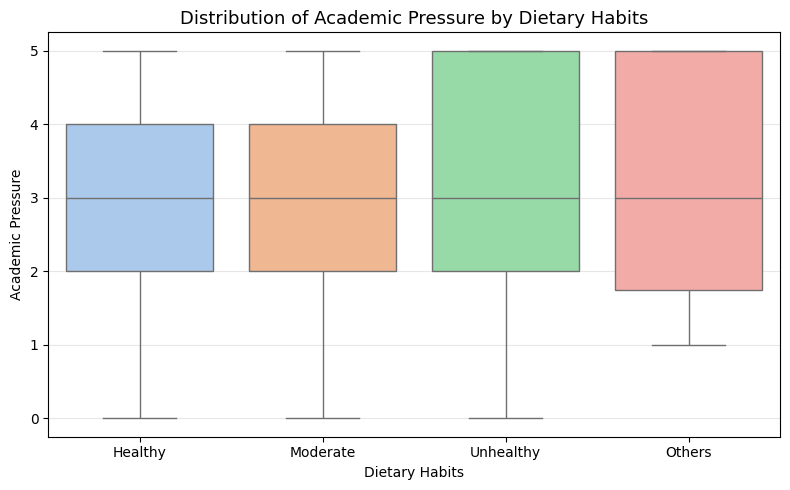

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=cleaned_data,
    x='Dietary Habits',
    y='Academic Pressure',
    palette='pastel'
)

plt.title("Distribution of Academic Pressure by Dietary Habits", fontsize=13)
plt.xlabel("Dietary Habits")
plt.ylabel("Academic Pressure")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


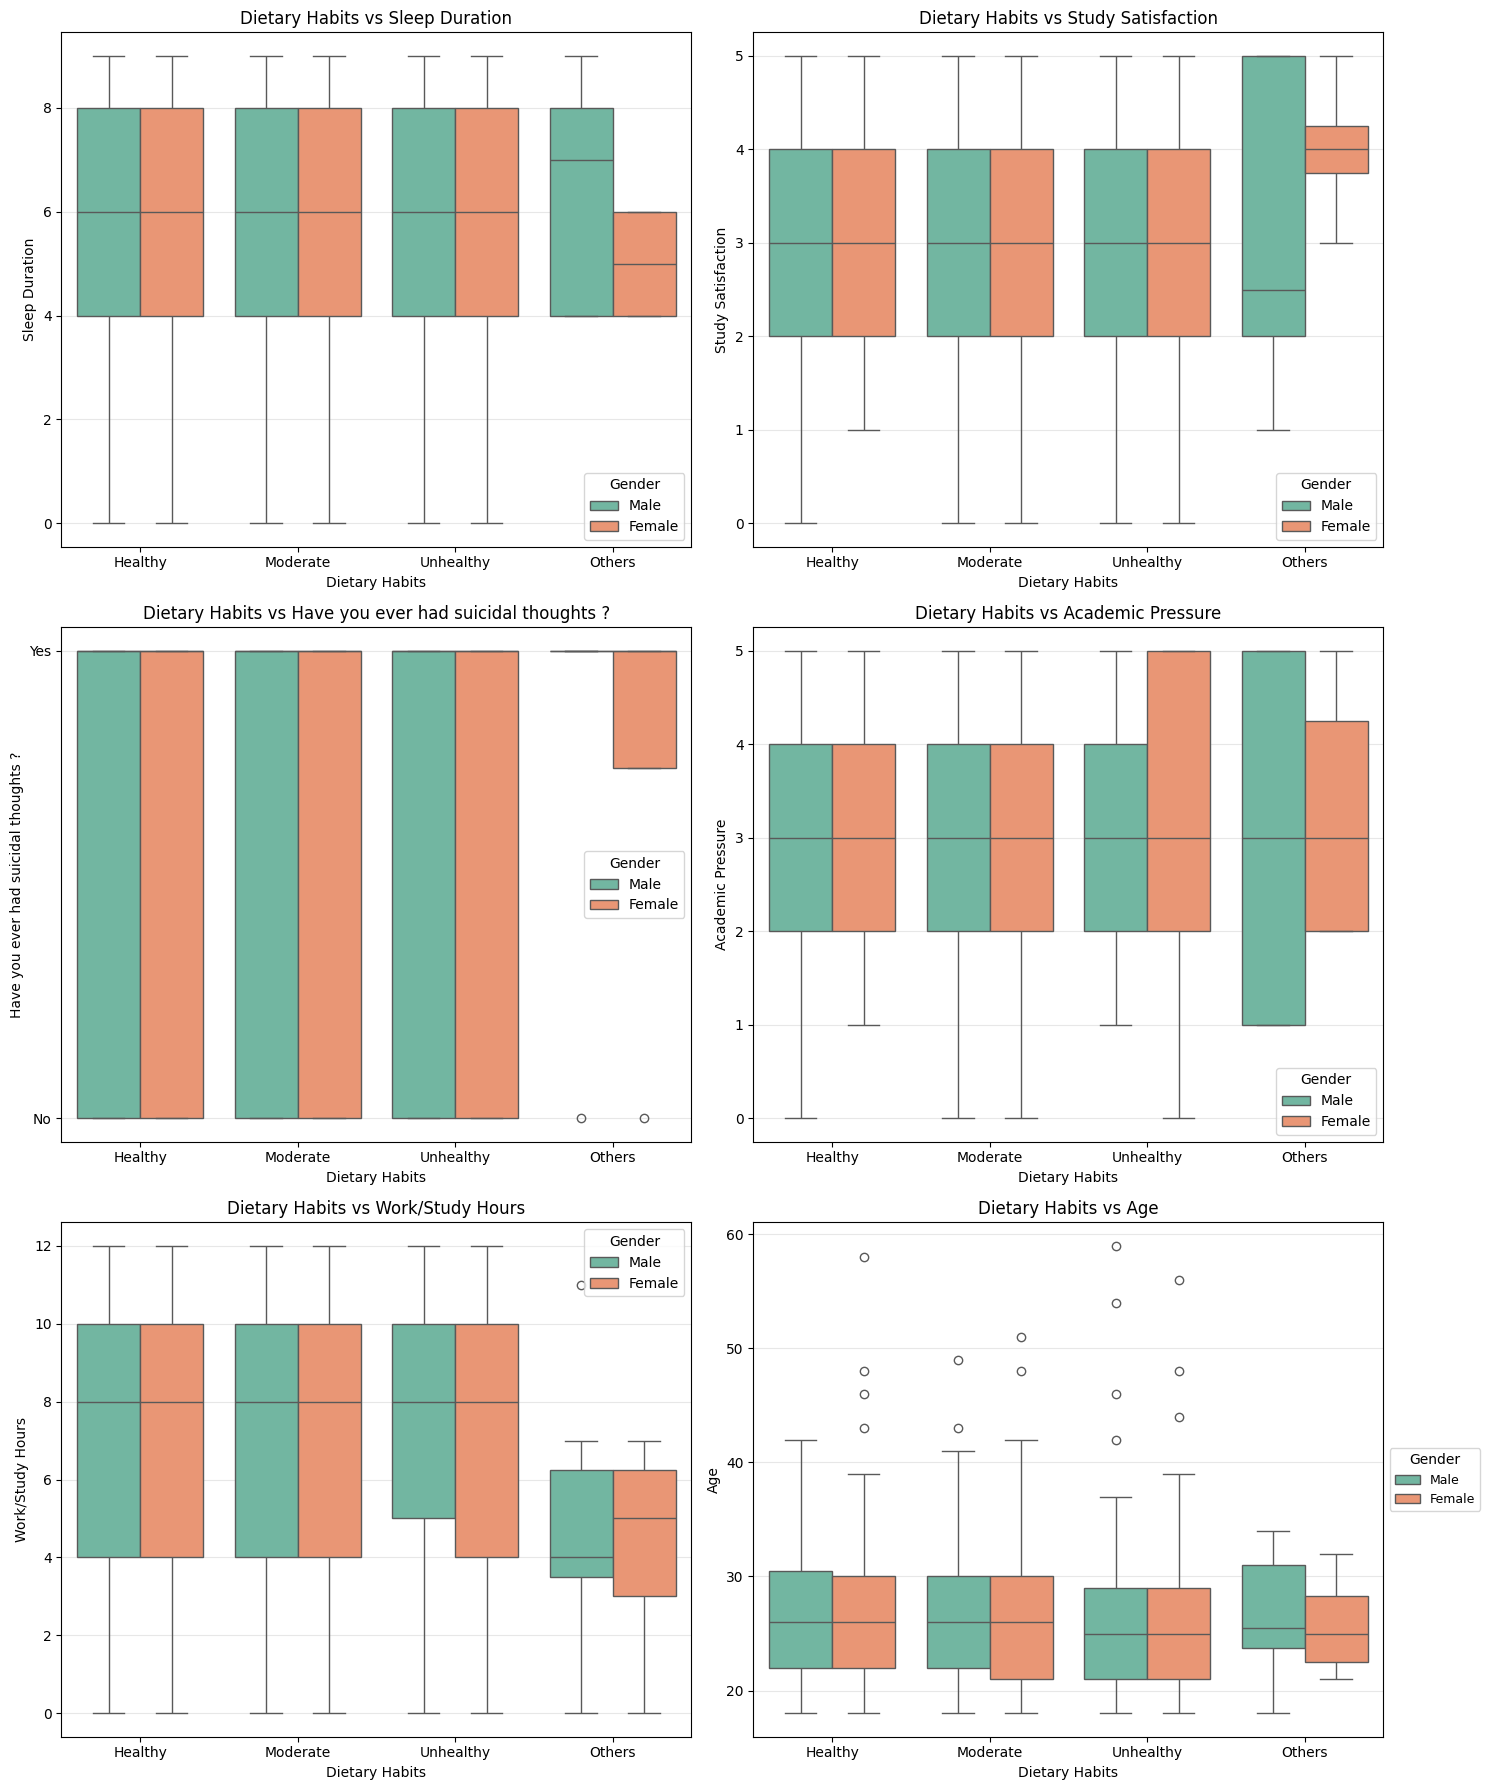

In [47]:
# List of columns to plot against Dietary Habits
columns_to_plot = [
    'Sleep Duration',
    'Study Satisfaction',
    'Have you ever had suicidal thoughts ?',
    'Academic Pressure',
    'Work/Study Hours',
    'Age'
]

# Number of subplots
n_cols = 2
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 18))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # Check if the column exists in the dataframe before plotting
    if col in cleaned_data.columns:
        sns.boxplot(
            data=cleaned_data,
            x='Dietary Habits',
            y=col,
            hue='Gender',
            palette='Set2',
            ax=axes[i]
        )
        axes[i].set_title(f'Dietary Habits vs {col}', fontsize=12)
        axes[i].set_xlabel('Dietary Habits')
        axes[i].set_ylabel(col)
        axes[i].grid(axis='y', alpha=0.3)
    else:
        # If column does not exist, hide the subplot axis
        fig.delaxes(axes[i])
        print(f"Column '{col}' not found in the DataFrame.")


# Adjust layout and remove extra legend
plt.legend(
    title="Gender",
    title_fontsize=10,
    fontsize=9,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.tight_layout()
plt.show()

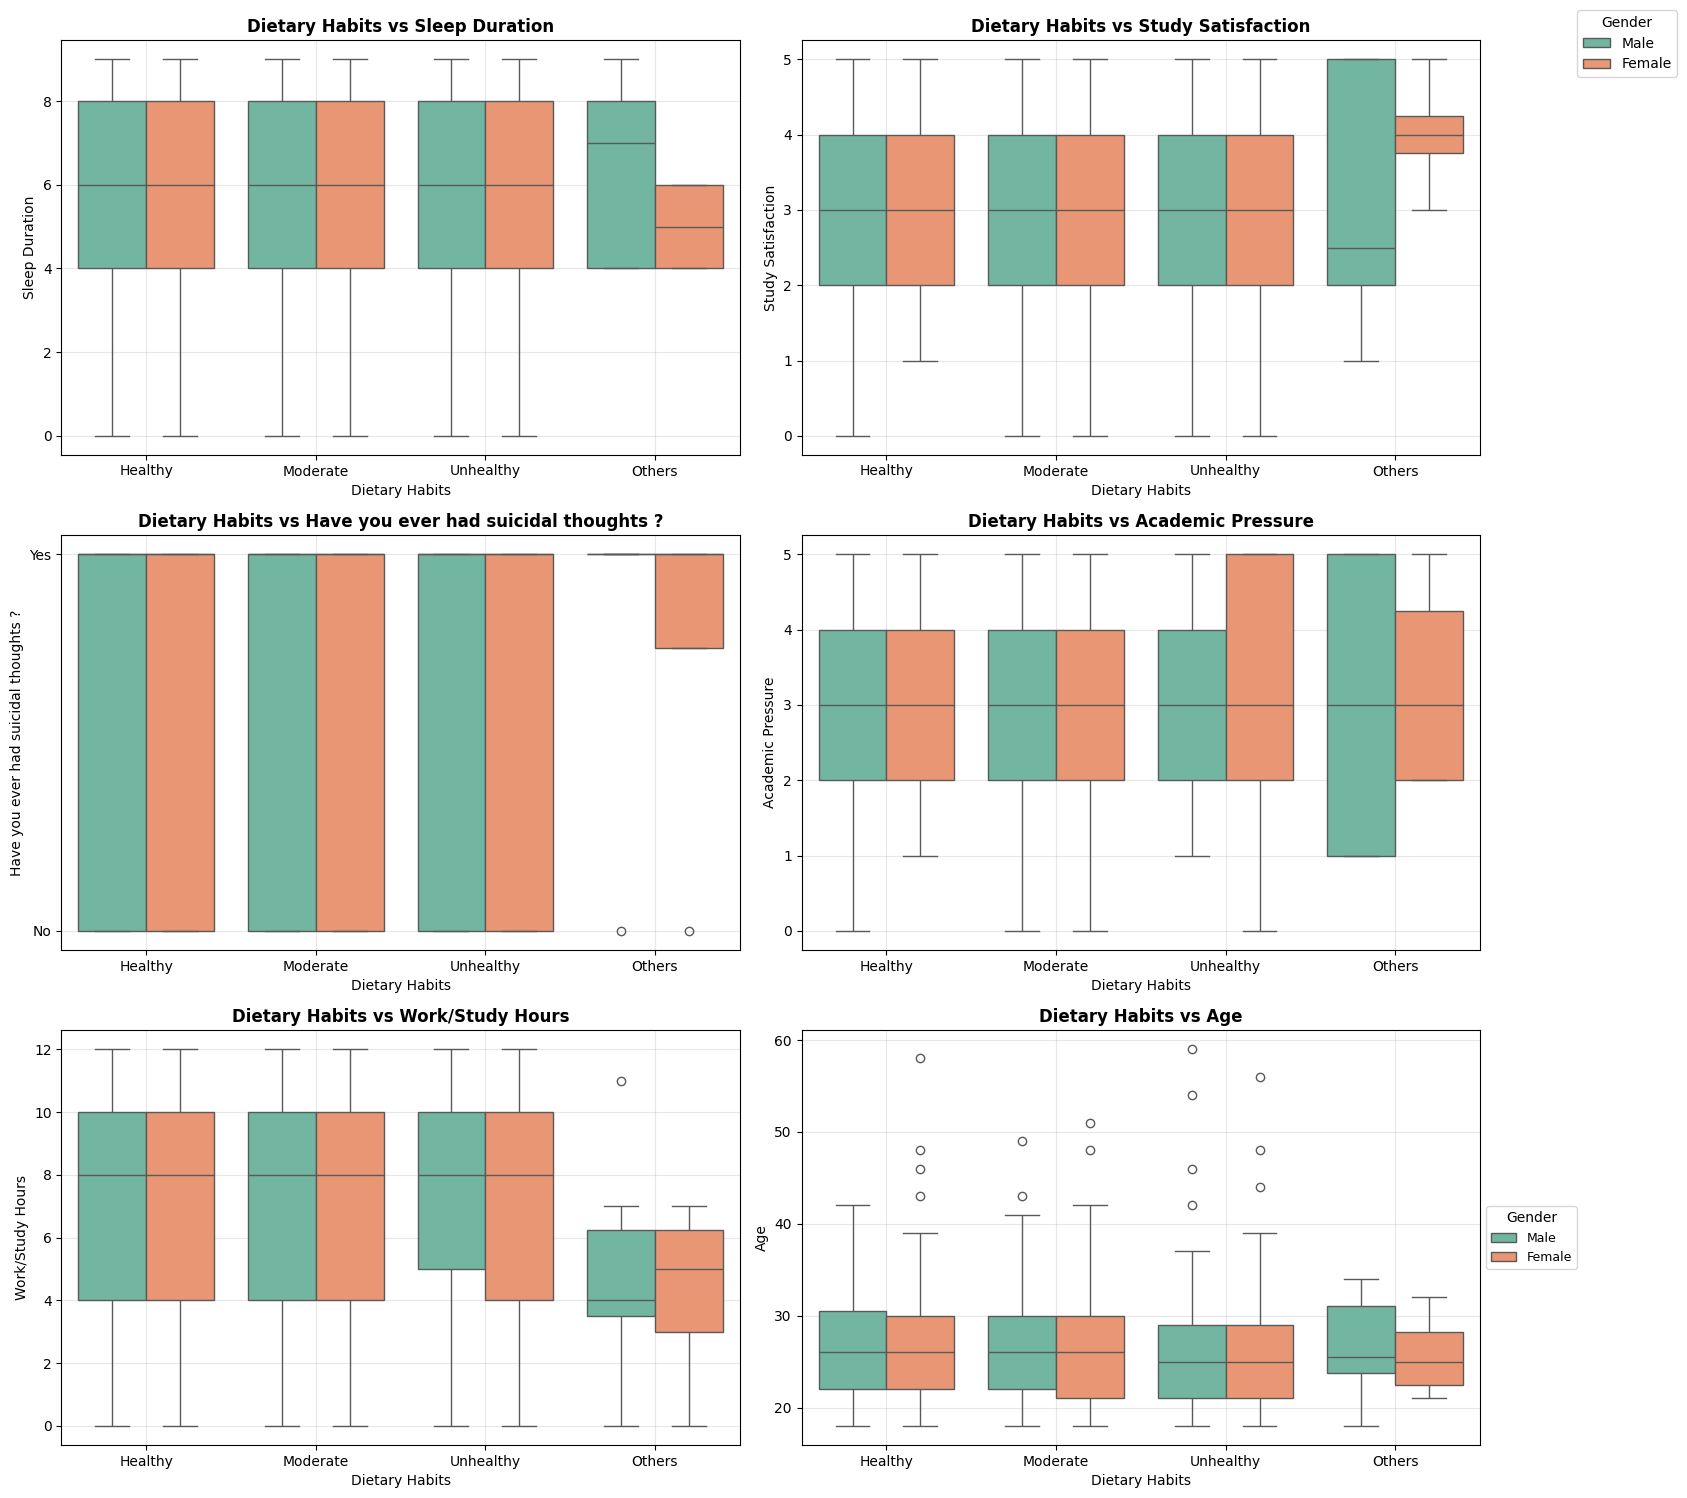

In [48]:
# List of y-variables to plot against Dietary Habits
y_vars = [
    'Sleep Duration',
    'Study Satisfaction',
    'Have you ever had suicidal thoughts ?',
    'Academic Pressure',
    'Work/Study Hours',
    'Age'
]

# Set up the figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

# Loop through y variables and create plots
for i, y_var in enumerate(y_vars):
    # Check if the column exists in the dataframe before plotting
    if y_var in cleaned_data.columns:
        sns.boxplot(
            data=cleaned_data,
            x='Dietary Habits',
            y=y_var,
            hue='Gender',
            palette='Set2',
            ax=axes[i]


        )
        axes[i].set_title(f'Dietary Habits vs {y_var}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Dietary Habits')
        axes[i].set_ylabel(y_var)
        axes[i].grid(alpha=0.3)
    else:
        # If column does not exist, hide the subplot axis
        fig.delaxes(axes[i])
        print(f"Column '{y_var}' not found in the DataFrame.")

# Adjust layout and legend
plt.tight_layout()
# Add a single legend for the hue across all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove individual legends from subplots
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()

plt.legend(
    title="Gender",
    title_fontsize=10,
    fontsize=9,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.show()

/tmp/ipython-input-619031547.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


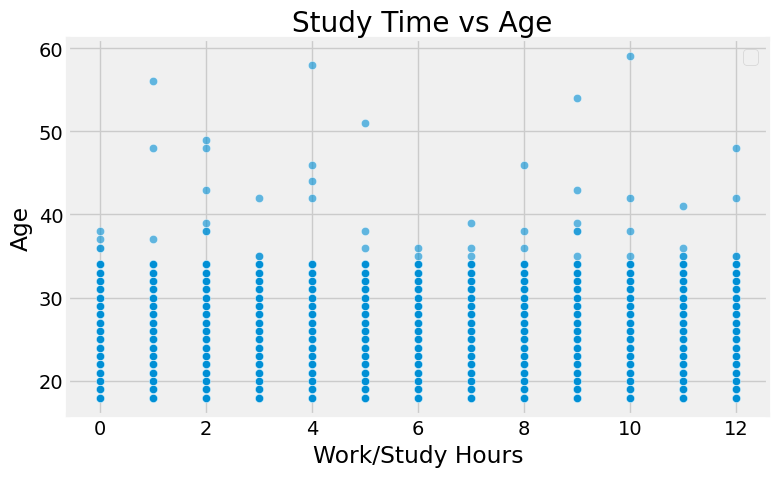

In [49]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
sns.scatterplot(
    data=cleaned_data,
    x='Work/Study Hours',
    y='Age',
    alpha=0.6
)
plt.legend()
plt.title(' Study Time vs Age')
plt.tight_layout()
plt.show()

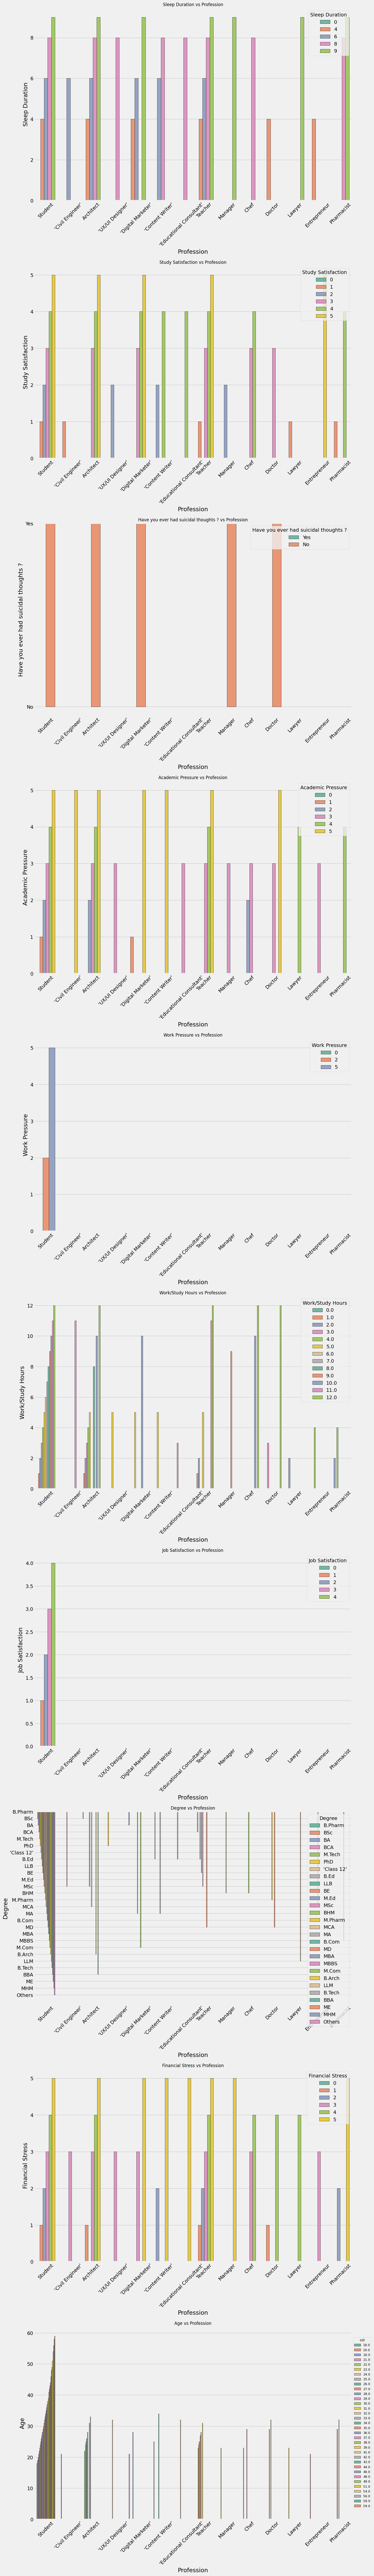

In [50]:
# List of columns to plot vs 'Profession'
columns_to_plot = [
    'Sleep Duration',
    'Study Satisfaction',
    'Have you ever had suicidal thoughts ?',
    'Academic Pressure',
    'Work Pressure',
    'Work/Study Hours',
    'Job Satisfaction',
    'Degree',
    'Financial Stress',
    'Age'
]

# Set up the subplot grid
n_cols = 1
n_rows = (len(columns_to_plot) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 10))
axes = axes.flatten()

# Loop through columns and plot barplots
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        data=df,
        x='Profession',
        y=col,
        hue=col,
        ax=axes[i],
        errorbar=None,
        palette='Set2',
        edgecolor='black'
    )
    axes[i].set_title(f'{col} vs Profession', fontsize=12)
    axes[i].set_xlabel('Profession')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45, colors='black')
    axes[i].tick_params(axis='y', colors='black')


# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.legend(
    title="col",
    title_fontsize=10,
    fontsize=9,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.tight_layout()
plt.show()

/tmp/ipython-input-20441175.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
/tmp/ipython-input-20441175.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
/tmp/ipython-input-20441175.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
/tmp/ipython-input-20441175.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.leg

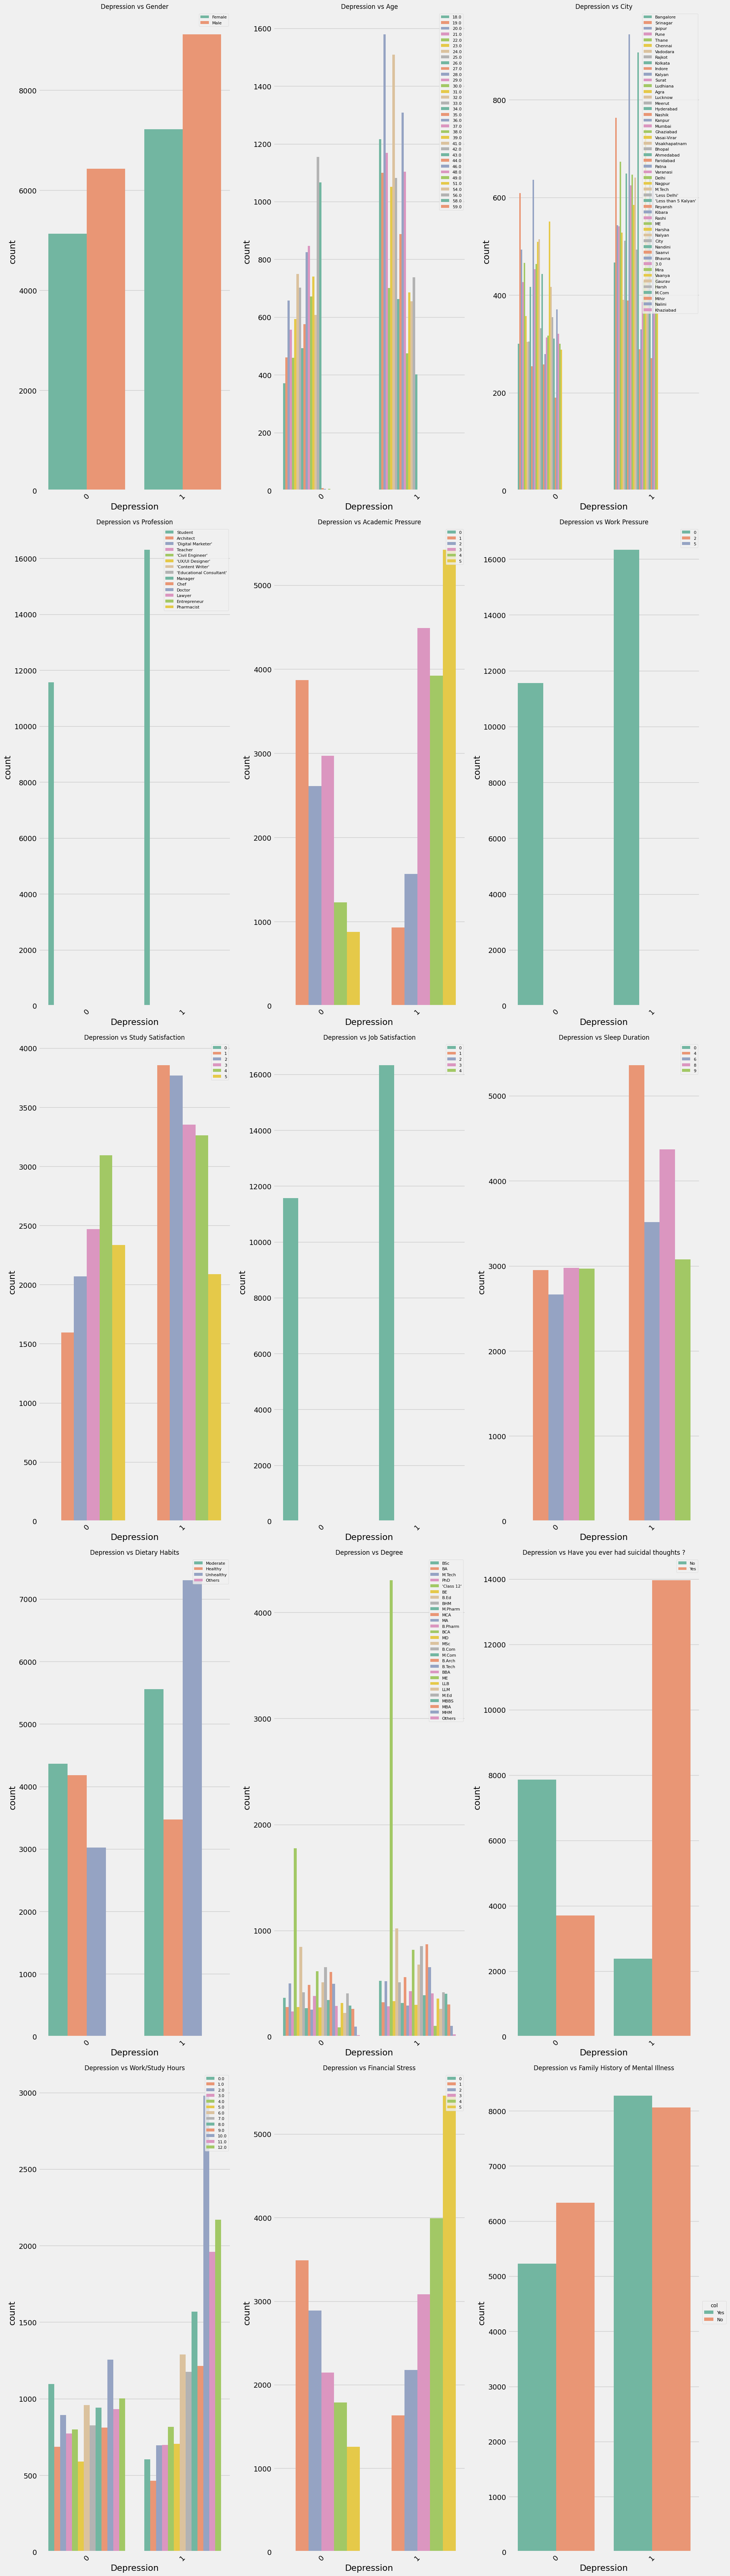

In [51]:
columns_to_plot = [
    'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
    'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
    'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness'
]
# Number of subplots
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 70))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.countplot(
        data=cleaned_data,
        x='Depression',
        hue=col,
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f'Depression vs {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(loc='upper right', fontsize=8)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.legend(
    title="col",
    title_fontsize=10,
    fontsize=9,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)
plt.tight_layout()
plt.show()

## Categorical Variable Correlation Function


In [52]:
def correlations_variable(x, y):
    # Build the confusion matrix
    confusion_matrix = pd.crosstab(x, y)

    # Perform Chi-squared test
    chi2 = ss.chi2_contingency(confusion_matrix)[0]

    # Number of observations
    n = confusion_matrix.sum().sum()

    # Calculate phi-squared
    phi2 = chi2 / n

    # Rows and columns of the matrix
    r, k = confusion_matrix.shape

    # Correction for bias
    phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    r_corr = r - ((r - 1)**2) / (n - 1)
    k_corr = k - ((k - 1)**2) / (n - 1)

    # Calculate Cramér's V
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))


In [53]:
# Correlation between all categorical features
categorical_cols = ['Gender','City','Profession', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            print(f"{col1} vs {col2}: {correlations_variable(cleaned_data[col1], cleaned_data[col2]):.3f}")

Gender vs City: 0.108
Gender vs Profession: 0.011
Gender vs Dietary Habits: 0.063
Gender vs Degree: 0.103
Gender vs Have you ever had suicidal thoughts ?: 0.000
Gender vs Family History of Mental Illness: 0.014
City vs Gender: 0.108
City vs Profession: 0.000
City vs Dietary Habits: 0.045
City vs Degree: 0.068
City vs Have you ever had suicidal thoughts ?: 0.035
City vs Family History of Mental Illness: 0.036
Profession vs Gender: 0.011
Profession vs City: 0.000
Profession vs Dietary Habits: 0.000
Profession vs Degree: 0.021
Profession vs Have you ever had suicidal thoughts ?: 0.000
Profession vs Family History of Mental Illness: 0.002
Dietary Habits vs Gender: 0.063
Dietary Habits vs City: 0.045
Dietary Habits vs Profession: 0.000
Dietary Habits vs Degree: 0.045
Dietary Habits vs Have you ever had suicidal thoughts ?: 0.113
Dietary Habits vs Family History of Mental Illness: 0.007
Degree vs Gender: 0.103
Degree vs City: 0.068
Degree vs Profession: 0.021
Degree vs Dietary Habits: 0.045


## Encode Categorical Features & Prepare Dataset


In [54]:
# Identify categorical columns from the current DataFrame
categorical_cols = ['Gender','City','Profession', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']

target_col = 'Depression'

# Separate features and target
features_cleaned_data = cleaned_data.drop(columns=[target_col])
target_cleaned_data = cleaned_data[target_col]

nominal_cols = features_cleaned_data.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding to nominal columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(features_cleaned_data[nominal_cols])
encoded_nominal_cleaned_data = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_cols), index=features_cleaned_data.index)

# Identify numerical columns
numerical_cols = features_cleaned_data.select_dtypes(include=np.number).columns.tolist()

numerical_cleaned_data = features_cleaned_data[numerical_cols]

cleaned_data_processed = pd.concat([numerical_cleaned_data, encoded_nominal_cleaned_data, target_cleaned_data], axis=1)

display(cleaned_data_processed.head())

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Depression
0,2,33.0,5,0,8.97,2,0,6,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,8,24.0,2,0,5.90,5,0,6,3.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,26,31.0,3,0,7.03,5,0,4,9.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,30,28.0,3,0,5.59,2,0,8,4.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,32,25.0,4,0,8.13,3,0,6,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [55]:
categorical_cols = ['Gender','City','Profession', 'Dietary Habits', 'Degree','Have you ever had suicidal thoughts ?','Family History of Mental Illness']
target_col = 'Depression'

features_cleaned_data = cleaned_data.drop(columns=[target_col])
target_cleaned_data = cleaned_data[target_col]

nominal_cols = features_cleaned_data.select_dtypes(include=['object']).columns.tolist()

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_nominal = onehot_encoder.fit_transform(features_cleaned_data[nominal_cols])
encoded_nominal_cleaned_data = pd.DataFrame(encoded_nominal, columns=onehot_encoder.get_feature_names_out(nominal_cols), index=features_cleaned_data.index)

numerical_cols = features_cleaned_data.select_dtypes(include=np.number).columns.tolist()

numerical_cleaned_data = features_cleaned_data[numerical_cols]

processed = pd.concat([numerical_cleaned_data, encoded_nominal_cleaned_data, target_cleaned_data], axis=1)

display(cleaned_data_processed.head())

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Depression
0,2,33.0,5,0,8.97,2,0,6,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,8,24.0,2,0,5.90,5,0,6,3.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,26,31.0,3,0,7.03,5,0,4,9.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,30,28.0,3,0,5.59,2,0,8,4.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,32,25.0,4,0,8.13,3,0,6,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


## Correlation Heatmap: Numerical Features & Target


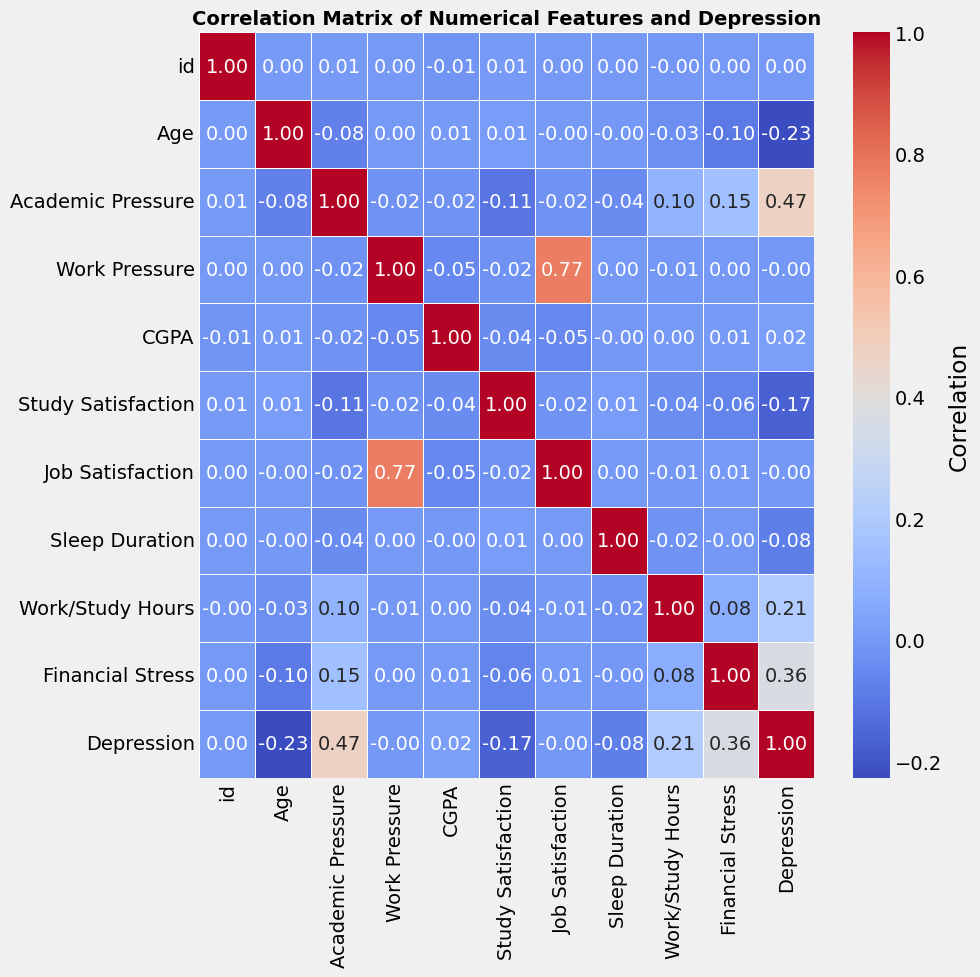

In [56]:
numerical_cols = numerical_cleaned_data.columns.tolist()
target_col = 'Depression'
cols_to_use = numerical_cols + [target_col]

df_numerical_target = cleaned_data_processed[cols_to_use]

plt.figure(figsize=(10, 10))

corr_matrix = df_numerical_target.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)

plt.title('Correlation Matrix of Numerical Features and Depression', fontsize=14, fontweight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [57]:
processed

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Depression
0,2,33.0,5,0,8.97,2,0,6,3.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,8,24.0,2,0,5.90,5,0,6,3.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,26,31.0,3,0,7.03,5,0,4,9.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,30,28.0,3,0,5.59,2,0,8,4.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,32,25.0,4,0,8.13,3,0,6,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5,0,5.75,5,0,6,7.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
27897,140686,27.0,2,0,9.40,3,0,4,0.0,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0
27898,140689,31.0,3,0,6.61,4,0,6,12.0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
27899,140690,18.0,5,0,6.88,2,0,4,10.0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1


## Standardization & Normalization of Numerical Features


In [58]:
numerical_cols = cleaned_data_processed.select_dtypes(include=np.number).columns.tolist()

if 'Depression' in numerical_cols:
    numerical_cols.remove('Depression')

scaler_standard = StandardScaler()
cleaned_data_standardized = cleaned_data_processed.copy()
cleaned_data_standardized[numerical_cols] = scaler_standard.fit_transform(cleaned_data_standardized[numerical_cols])

print("DataFrame after Standardization (first 5 rows):")
display(cleaned_data_standardized.head())

scaler_minmax = MinMaxScaler()
cleaned_data_normalized = cleaned_data_processed.copy()
cleaned_data_normalized[numerical_cols] = scaler_minmax.fit_transform(cleaned_data_normalized[numerical_cols])

print("\nDataFrame after Normalization (Min-Max Scaling) (first 5 rows):")
display(cleaned_data_normalized.head())


DataFrame after Standardization (first 5 rows):


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Depression
0,-1.733252,1.463165,1.345543,-0.009777,0.893393,-0.693425,-0.01534,-0.292704,-1.121213,-1.488252,...,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079,-0.761745,0.761745,0.968421,-0.968421,1
1,-1.733105,-0.371474,-0.826104,-0.009777,-1.194076,1.510636,-0.01534,-0.292704,-1.121213,-0.792654,...,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079,1.312775,-1.312775,-1.032609,1.032609,0
2,-1.732662,1.055467,-0.102222,-0.009777,-0.425724,1.510636,-0.01534,-1.307458,0.497095,-1.488252,...,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079,1.312775,-1.312775,-1.032609,1.032609,0
3,-1.732563,0.443921,-0.102222,-0.009777,-1.404862,-0.693425,-0.01534,0.722050,-0.851495,1.294140,...,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079,-0.761745,0.761745,-1.032609,1.032609,1
4,-1.732514,-0.167625,0.621660,-0.009777,0.322229,0.041262,-0.01534,-0.292704,-1.660650,-1.488252,...,-0.0817,-0.083023,-0.211071,-0.03544,-0.138079,-0.761745,0.761745,0.968421,-0.968421,0



DataFrame after Normalization (Min-Max Scaling) (first 5 rows):


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes,Depression
0,0.000000,0.365854,1.0,0.0,0.897,0.4,0.0,0.666667,0.250000,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.000043,0.146341,0.4,0.0,0.590,1.0,0.0,0.666667,0.250000,0.4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.000171,0.317073,0.6,0.0,0.703,1.0,0.0,0.444444,0.750000,0.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.000199,0.243902,0.6,0.0,0.559,0.4,0.0,0.888889,0.333333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,0.000213,0.170732,0.8,0.0,0.813,0.6,0.0,0.666667,0.083333,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


##  Train-Test Split


In [59]:
X = cleaned_data_normalized.drop(columns='Depression')
y = cleaned_data_normalized['Depression']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (22320, 114)
Shape of X_test: (5581, 114)
Shape of y_train: (22320,)
Shape of y_test: (5581,)


## Create and Test Model


##Define Models

In [60]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}


In [61]:
results = {}


for name, model in models.items():
    print(f"\n===== Training {name} =====")


    model.fit(X_train, y_train)


    y_train_pred = model.predict(X_train)
    train_metrics = {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, zero_division=0),
        "Recall": recall_score(y_train, y_train_pred, zero_division=0),
        "F1 Score": f1_score(y_train, y_train_pred, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_train, y_train_pred).tolist()
    }

    try:
        if hasattr(model, "predict_proba"):
            y_train_prob = model.predict_proba(X_train)[:, 1]
            train_metrics["ROC AUC"] = roc_auc_score(y_train, y_train_prob)
        else:
            train_metrics["ROC AUC"] = "N/A"
    except Exception as e:
        train_metrics["ROC AUC"] = f"Error: {e}"


    y_test_pred = model.predict(X_test)
    test_metrics = {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, zero_division=0),
        "Recall": recall_score(y_test, y_test_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_test_pred, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred).tolist()
    }


    try:
        if hasattr(model, "predict_proba"):
            y_test_prob = model.predict_proba(X_test)[:, 1]
            test_metrics["ROC AUC"] = roc_auc_score(y_test, y_test_prob)
        else:
            test_metrics["ROC AUC"] = "N/A"
    except Exception as e:
        test_metrics["ROC AUC"] = f"Error: {e}"


    results[name] = {
        "Train Metrics": train_metrics,
        "Test Metrics": test_metrics
    }

    print(f"{name} - Train Accuracy: {train_metrics['Accuracy']:.4f}, Test Accuracy: {test_metrics['Accuracy']:.4f}")
    print("-" * 50)


flattened_results = []

for model_name, metrics in results.items():
    row = {"Model": model_name}
    for prefix, metric_dict in metrics.items():
        for metric_name, value in metric_dict.items():
            row[f"{prefix} {metric_name}"] = value
    flattened_results.append(row)

results_cleaned_data = pd.DataFrame(flattened_results)
display(results_cleaned_data)



===== Training Logistic Regression =====
Logistic Regression - Train Accuracy: 0.8493, Test Accuracy: 0.8457
--------------------------------------------------

===== Training Decision Tree =====
Decision Tree - Train Accuracy: 1.0000, Test Accuracy: 0.7707
--------------------------------------------------

===== Training Random Forest =====
Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.8382
--------------------------------------------------

===== Training SVM =====
SVM - Train Accuracy: 0.8631, Test Accuracy: 0.8423
--------------------------------------------------

===== Training Extra Trees =====
Extra Trees - Train Accuracy: 1.0000, Test Accuracy: 0.8314
--------------------------------------------------

===== Training XGBoost =====


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:02:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Train Accuracy: 0.9230, Test Accuracy: 0.8343
--------------------------------------------------

===== Training LightGBM =====
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13068, number of negative: 9252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 694
[LightGBM] [Info] Number of data points in the train set: 22320, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.585484 -> initscore=0.345327
[LightGBM] [Info] Start training from score 0.345327
LightGBM - Train Accuracy: 0.8753, Test Accuracy: 0.8412
--------------------------------------------------


,Model,Train Metrics Accuracy,Train Metrics Precision,Train Metrics Recall,Train Metrics F1 Score,Train Metrics Confusion Matrix,Train Metrics ROC AUC,Test Metrics Accuracy,Test Metrics Precision,Test Metrics Recall,Test Metrics F1 Score,Test Metrics Confusion Matrix,Test Metrics ROC AUC
0,Logistic Regression,0.849328,0.858250,0.889578,0.873633,"[[7332, 1920], [1443, 11625]]",0.923001,0.845727,0.858078,0.882497,0.870116,"[[1836, 477], [384, 2884]]",0.918512
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,"[[9252, 0], [0, 13068]]",1.000000,0.770650,0.804721,0.803244,0.803982,"[[1676, 637], [643, 2625]]",0.763922
2,Random Forest,1.000000,1.000000,1.000000,1.000000,"[[9252, 0], [0, 13068]]",1.000000,0.838201,0.848717,0.880661,0.864394,"[[1800, 513], [390, 2878]]",0.913144
3,SVM,0.863127,0.868260,0.903275,0.885422,"[[7461, 1791], [1264, 11804]]",0.933659,0.842322,0.850764,0.886169,0.868106,"[[1805, 508], [372, 2896]]",0.917023
4,Extra Trees,1.000000,1.000000,1.000000,1.000000,"[[9252, 0], [0, 13068]]",1.000000,0.831392,0.838719,0.881579,0.859615,"[[1759, 554], [387, 2881]]",0.907798
5,XGBoost,0.922984,0.922745,0.947811,0.935110,"[[8215, 1037], [682, 12386]]",0.977384,0.834259,0.848557,0.872705,0.860462,"[[1804, 509], [416, 2852]]",0.910752
6,LightGBM,0.875314,0.882030,0.908555,0.895096,"[[7664, 1588], [1195, 11873]]",0.948301,0.841247,0.854887,0.877907,0.866244,"[[1826, 487], [399, 2869]]",0.917780


## Model Evaluation & Best Model Selection


In [62]:
# Flatten the nested dictionary into a DataFrame
flattened_results = []

for model_name, metrics in results.items():
    row = {"Model": model_name}
    for prefix, metric_dict in metrics.items():
        for metric_name, value in metric_dict.items():
            row[f"{prefix} {metric_name}"] = value
    flattened_results.append(row)

results_df = pd.DataFrame(flattened_results).set_index("Model")

# Identify the model with the highest Test Accuracy
best_model_name = results_df["Test Metrics Accuracy"].astype(float).idxmax()
best_model_score = results_df.loc[best_model_name, "Test Metrics Accuracy"]

# Print best model summary
print("===========================================")
print(f" Best Model: {best_model_name}")
print(f" Test Accuracy: {best_model_score:.4f}")
print("===========================================")

# Show detailed performance metrics
print("\nDetailed performance of the best model:\n")
display(results_df.loc[[best_model_name]])


 Best Model: Logistic Regression
 Test Accuracy: 0.8457

Detailed performance of the best model:



,Train Metrics Accuracy,Train Metrics Precision,Train Metrics Recall,Train Metrics F1 Score,Train Metrics Confusion Matrix,Train Metrics ROC AUC,Test Metrics Accuracy,Test Metrics Precision,Test Metrics Recall,Test Metrics F1 Score,Test Metrics Confusion Matrix,Test Metrics ROC AUC
Model,,,,,,,,,,,,
Logistic Regression,0.849328,0.85825,0.889578,0.873633,"[[7332, 1920], [1443, 11625]]",0.923001,0.845727,0.858078,0.882497,0.870116,"[[1836, 477], [384, 2884]]",0.918512


##  Test with User Inputs
### Selected Models: Logistic Regression, SVM


In [63]:
# Example user input (replace values with actual user data)
user_input_raw = {
    'Gender': 'Male',
    'Age': 22.0,
    'City': 'Visakhapatnam',
    'Profession': 'Student',
    'Academic Pressure': 3.0,
    'Work Pressure': 0.0,
    'CGPA': 3.5,
    'Study Satisfaction': 4.0,
    'Job Satisfaction': 0.0,
    'Sleep Duration': 6,
    'Dietary Habits': 'Healthy',
    'Degree': 'B.Pharm',
    'Have you ever had suicidal thoughts ?': 'No',
    'Work/Study Hours': 5.0,
    'Financial Stress': 2,
    'Family History of Mental Illness': 'No'
}

# Convert to DataFrame
user_df_raw = pd.DataFrame([user_input_raw])

#  Separate categorical and numerical columns
categorical_cols_user = user_df_raw.select_dtypes(include='object').columns.tolist()
numerical_cols_user = user_df_raw.select_dtypes(include=np.number).columns.tolist()

# Apply One-Hot Encoding to nominal categorical columns
user_encoded_nominal = onehot_encoder.transform(user_df_raw[categorical_cols_user])
user_encoded_nominal_df = pd.DataFrame(user_encoded_nominal, columns=onehot_encoder.get_feature_names_out(categorical_cols_user), index=user_df_raw.index)

#  Select numerical columns
user_numerical_df = user_df_raw[numerical_cols_user]

#  Concatenate numerical and encoded nominal features
user_df_processed = pd.concat([user_numerical_df, user_encoded_nominal_df], axis=1)

#  Ensure all columns from training data are present, fill missing with 0
train_cols = X_train.columns
user_df_processed = user_df_processed.reindex(columns=train_cols, fill_value=0)

#  Apply Min-Max Scaling to numerical columns
numerical_cols_user_processed = user_df_processed.select_dtypes(include=np.number).columns.tolist()

user_df_scaled = user_df_processed.copy()
user_df_scaled[numerical_cols_user_processed] = scaler_minmax.transform(user_df_scaled[numerical_cols_user_processed])

# Display the preprocessed user input
print("Preprocessed user input:")
display(user_df_scaled)


print("\nPredictions based on preprocessed user input:")
for name, model in models.items():

    prediction = model.predict(user_df_scaled)
    if hasattr(model, "predict_proba"):
        probability = model.predict_proba(user_df_scaled)[:, 1]
        print(f"{name} Prediction: {prediction[0]}, Probability: {probability[0]:.2f}")
    else:
        print(f"{name} Prediction: {prediction[0]}")

Preprocessed user input:


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Work/Study Hours,Financial Stress,...,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_No,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_No,Family History of Mental Illness_Yes
0,-0.000014,0.097561,0.6,0.0,0.35,0.8,0.0,0.666667,0.416667,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0



Predictions based on preprocessed user input:
Logistic Regression Prediction: 0, Probability: 0.06
Decision Tree Prediction: 0, Probability: 0.00
Random Forest Prediction: 0, Probability: 0.14
SVM Prediction: 0, Probability: 0.05
Extra Trees Prediction: 0, Probability: 0.13
XGBoost Prediction: 0, Probability: 0.01
LightGBM Prediction: 0, Probability: 0.07
